# Regressão Logística
A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

Em estatística, o modelo logístico (ou modelo logit) é usado para modelar a probabilidade de uma determinada classe ou evento existir, como passa/falha, ganha/perde, vivo/morto ou saudável/doente.

O gráfico da regressão logística se parece com um ‘S’ entre 0 e 1. Este tipo de gráfico é conhecido como Sigmoid:
![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*pd_Iaq4P8llKi_3iloNhEA.png)

Parece semelhante à regressão linear, mas na verdade não é. A regressão linear é um algoritmo de previsão. Por outro lado, a regressão logística é um algoritmo de classificação.


**Fórmula**:

![](https://estatsite.com.br/wp-content/uploads/2018/08/3-1.png)

A regressão logística não prevê os valores contínuos. A regressão logística prevê se algo é Verdadeiro ou Falso.

Usaremos aqui um exemplo um bem famoso: conjunto de dados Titanic. Com mais de uma *feature* e, com a regressão logística, poderemos prever se estão vivos ou não. Se o valor previsto pelo modelo fosse 0,79, isso significaria que a pessoa está 79% viva e 21% morta.

Quando a probabilidade é maior ou igual a 0,5, o valor binário é 1, quando a probabilidade é menor que 0,5, o valor binário é 0. Então, a pessoa citada acima será classificada como 1, viva. O modelo retorna 1 (verdadeiro).




---
### **1. Importando e processando os dados**
Como dito, usaremos o dataset Titanic, que contém informações dos passageiros do Titanic:

* **pclass**: Classe do passageiro (1 = 1a; 2 = 2a; 3 = 3a)
* **survivaed**: se sobreviveu ao naufrágio (0 = Não; 1 = Sim)
* **sex**: Sexo
* **age**: idade
* **sibsp**: número de irmãos e esposas abordo
* **parch**: número de pais e crianças abordo
* **fare**: tarifa da passagem (libra)
* **embarked**: porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
* **class**: classe do passageiro (first, second, third)
* **who**: se é homem ou mulher
* **adult_male**: sé um adulto do gênero masculino
* **deck**: deck (sessão do navio) da cabine do passageiro
* **embark_town**: cidade de embarque
* **alive**: se sobreviveu ou não 
* **alone**: se estava sozinho ou não

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
plt.style.use('ggplot') # check for more with plt.style.available

In [ ]:
data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Como você pode ver, temos valores nulos nas colunas 'age', 'embarked', 'deck', 'embarked_town'. Vamos abandonar alguns deles e lidar com o resto.

Algumas das colunas têm os mesmos valores com tipos ou nomes de valores diferentes. Como 'who', 'sex' e 'adult_male'. Também não os queremos.

In [ ]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)

In [ ]:
data_2.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


Algumas colunas possuem valores nulos.
A coluna **age** também. Vamos ver sua variação:

In [ ]:
print(f"Idade máxima : {data_2['age'].max()}")
print(f"Idade mínima : {data_2['age'].min()}")

Idade máxima : 80.0
Idade mínima : 0.42


Possui uma amplitude grande (0~80), vamos catergorizá-la de uma forma customizada.

In [ ]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)

In [ ]:
pd.DataFrame(data_2['age'].value_counts())

,age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


Ainda temos valores nulos na coluna **age**. A moda desta coluna é Adulto

In [ ]:
data_2['age'].mode()[0]

'Adult'

Assim, preencheremos as linhas nulas com a moda

In [ ]:
data_4 = data_2.fillna({'age' : data_2['age'].mode()[0]})

Coluna **age** está ok. Vamos tratar agora a coluna **embarked**

In [ ]:
data_2['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
print(f"Qtos embarcaram em 'S': {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"Qtos embarcaram em 'C': {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"Qtos embarcaram em 'Q': {data_2[data_2['embarked'] == 'Q'].shape[0]}")

Qtos embarcaram em 'S': 644
Qtos embarcaram em 'C': 168
Qtos embarcaram em 'Q': 77


Usaremos também a moda para os valores nulos

In [ ]:
data_3 = data_2.fillna({'embarked' : 'S'})
data_4[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')

,survived
pclass,
2,87
3,119
1,136


In [ ]:
data_4[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived')

,survived
sex,
male,109
female,233


Categorizemos também a coluna **fare**

In [ ]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_4['fare'] = pd.cut(data_3["fare"], bins = bins, labels = labels)

Vamos também *droppar* a coluna **class** que é a mesma coisa que **pclass**

In [ ]:
data_5 = data_4.drop('class', axis=1)

In [ ]:
data_5.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891,889
unique,NaN,NaN,2,5,NaN,NaN,4,3
top,NaN,NaN,male,Adult,NaN,NaN,medium-low,S
freq,NaN,NaN,577,526,NaN,NaN,224,644
mean,0.383838,2.308642,NaN,NaN,0.523008,0.381594,NaN,NaN
std,0.486592,0.836071,NaN,NaN,1.102743,0.806057,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,NaN


<Axes: xlabel='survived', ylabel='Density'>

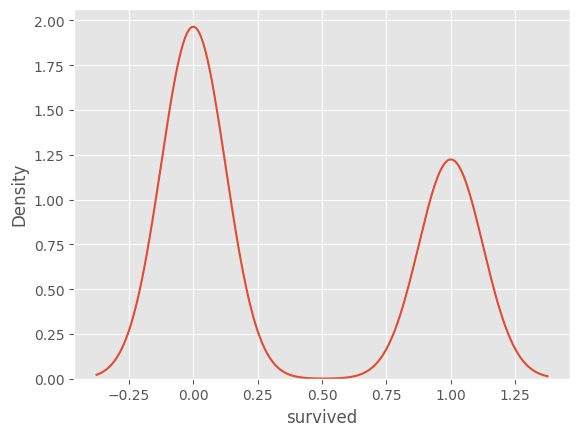

In [ ]:
# sns.histplot(data_5['survived'], kde=True)
sns.kdeplot(data_5['survived'])

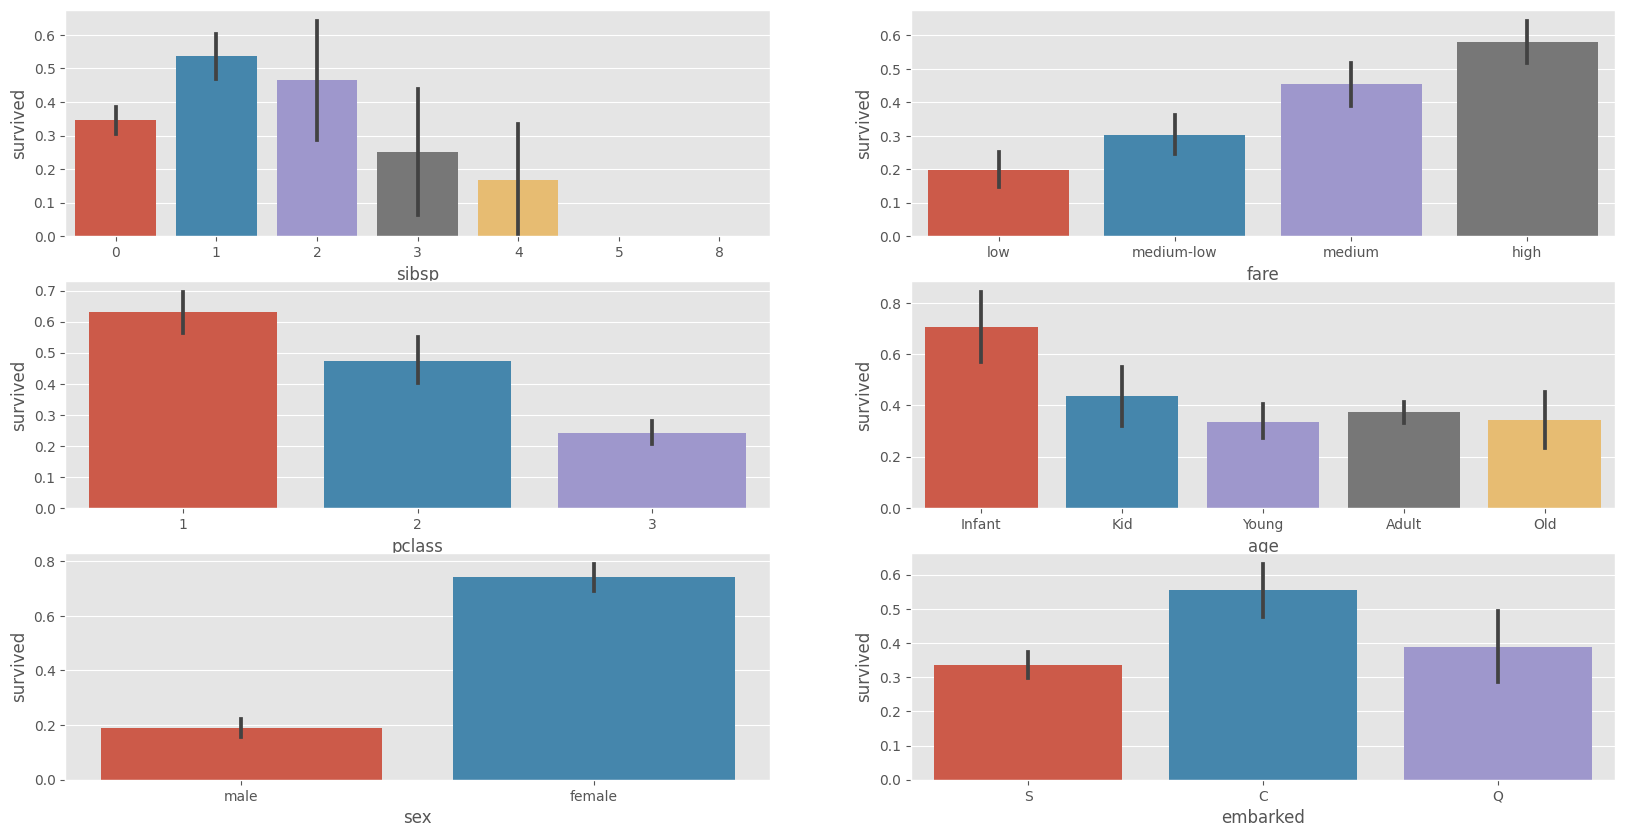

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data_5)
plt.subplot(322)
sns.barplot(x = 'fare', y = 'survived', data = data_5)
plt.subplot(323)
sns.barplot(x = 'pclass', y = 'survived', data = data_5)
plt.subplot(324)
sns.barplot(x = 'age', y = 'survived', data = data_5)
plt.subplot(325)
sns.barplot(x = 'sex', y = 'survived', data = data_5)
plt.subplot(326)
sns.barplot(x = 'embarked', y = 'survived', data = data_5);

Vejamos como as variáveis se correlacionam

<ipython-input-20-1da4ca34907a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_5.corr()


Text(0.5, 1.0, 'Correlação entre as varíaveis')

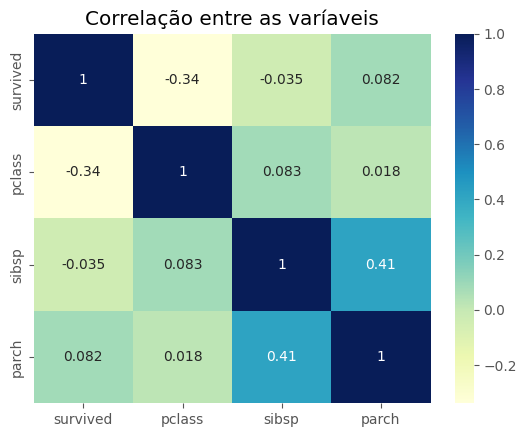

In [ ]:
corr = data_5.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True);
plt.title('Correlação entre as varíaveis')

Modelos de aprendizado de máquina **odeiam** valores não numéricos. Não podemos colocá-los em nossos dados de treinamento e teste. Precisamos convertê-los em valores numéricos. Temos duas opções para isso; Label Encoder e método get_dummies do Pandas.Vamos de get_dummies.

In [ ]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummy_data = pd.get_dummies(data_5[dummies])

Vamos dar uma espiada. O *dataframe* 'dummies' contém colunas que nós queremos converter em valores númericos. Cada variável dentro de cada coluna se tornará uma coluna, e sua ausência definirá como 0 e 1 se são verdadeiros para esse passageiro ou não.

In [ ]:
dummy_data.shape

(891, 14)

Vamos concatenar os dois *dataframes* e *droppar* as colunas antigas.

In [ ]:
data_6 = pd.concat([data_5, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)
data_6.shape

(891, 18)

In [ ]:
data_6.columns

Index(['survived', 'pclass', 'sibsp', 'parch', 'fare_low', 'fare_medium-low',
       'fare_medium', 'fare_high', 'age_Infant', 'age_Kid', 'age_Young',
       'age_Adult', 'age_Old', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male'],
      dtype='object')

In [ ]:
data_6.tail()

,survived,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
886,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,0,3,1,2,0,0,1,0,0,0,0,1,0,0,0,1,1,0
889,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
890,0,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1


### **2. Criando Modelo de Regressão Logística**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc

Separando conteúdos de treinamentos e testes

In [ ]:
X = data_6.drop('survived', axis = 1)
y = data_6['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
# X contains independent values, y contains dependent value

Construindo o modelo

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

### **3. Validando o modelo**

**acurácia**:
A acurácia não é uma medida muito boa para trabalhar com modelos de classificação pois ela pode nos induzir a achar que um modelo que prediz corretamente todos os zeros mas nenhum um é um modelo muito bom. 

In [ ]:
accuracy_score(y_pred, y_test)

0.8067796610169492

Vejamos outras alternativas de métricas mais interessantes do que a acurácia.
Matriz confusão:

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Z54JgbS4DUwWSknhDCvNTQ.png)

In [ ]:
confusion_matrix(y_pred, y_test)
# 31 + 26 = 57 wrong prediction

array([[158,  31],
       [ 26,  80]])

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*7EYylA6XlXSGBCF77j_rOA.png)

Algumas métricas a partir da Matriz Confusão

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*uR09zTlPgIj5PvMYJZScVg.png)

**Precision** é a capacidade do modelo de não prever uma instância negativa como positiva (não cometer erro do tipo 1). Para todas as instância classificadas como positivas, qual é o percentual de acerto.

**Recall** é a capacidade do modelo de encontrar todas as instâncias positivas. Para todas as instâncias que são de fato positivas, qual é o percentual de acerto.

O classification report do SciKit-Learn nos provê as três métricas de avaliação:.


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       189
           1       0.72      0.75      0.74       106

    accuracy                           0.81       295
   macro avg       0.79      0.80      0.79       295
weighted avg       0.81      0.81      0.81       295




A métrica **F1** conjuga as duas anteriores como uma média harmônica entre ambas. Ela deve sempre ser priorizada para comparar modelos de classificação em relação à acurácia.


Uma excelente alternativa é fazer a curva **ROC** e calcular o **AUC** (área debaixo da curva).

A curva ROC (Receiver Operating Characteristic Curve) leva em conta a TPR (True Positive Rate ou Recall ou Sensitity) e a FPR (False Positive Rate ou Specificity).

A curva ROC traça esses dois parâmetros. o AUC (Area Under the Curve) é um valor que sintetiza a informação da curva ROC. Ela varia de 0.5 a 1. Em suma, essa métrica nos diz o quanto o modelo é capaz de distinguir as duas classes. Vejamos o AUC e a curva ROC para o modelo que estimamos.

In [ ]:
print('AUC: %0.2f' % roc_auc_score(y_test, y_pred))

AUC: 0.79


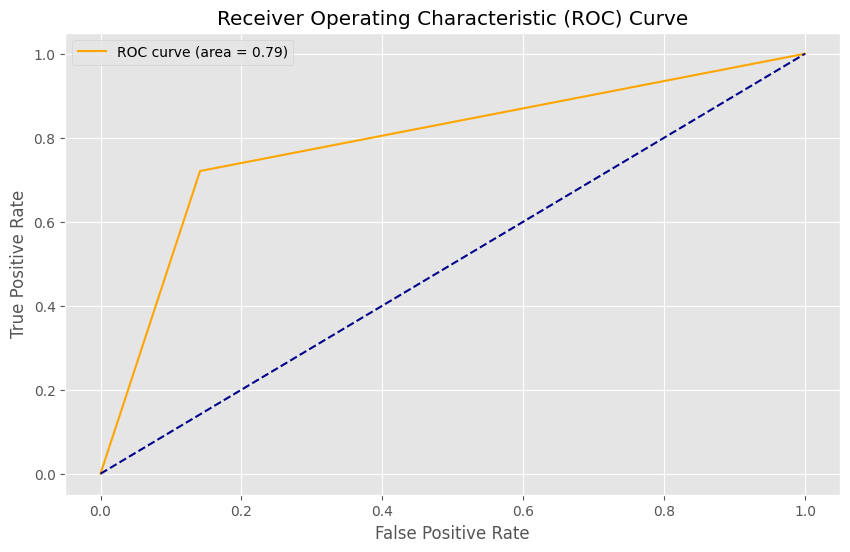

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,6))
auc_value = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Podemos considerar uma área debaixo da curva de mais de 0.7 como aceitável. Mais de 0.8 parece bom.
Podemos melhorar mais com ajustes nos parâmetros do modelo e também outras métricas que podemos explorar.

### **4. Fazendo Predições**

Vamos prever a nossa probabilidade de sobrevivência no Titanic e também a probabilidade de sobrevivência do coleguinha. Para fazer predições, é importante entrar os dados no modelo com o mesmo formato usado para treino.

In [ ]:
eu = pd.DataFrame({'pclass':1, 'sibsp':1, 'parch':0, 'fare_low':0, 'fare_medium-low':0,
       'fare_medium':0, 'fare_high':1, 'age_Infant':0, 'age_Kid':0, 'age_Young':0,
       'age_Adult':1, 'age_Old':0, 'embarked_C':0, 'embarked_Q':1, 'embarked_S':0,
       'sex_female':0, 'sex_male':1}, index=[0])
minha_prob = log_reg.predict_proba(eu)
print('Eu teria {}% de probabilidade de sobrevivência se estivesse no Titanic'\
      .format(round(minha_prob[:,1][0]*100, 2)))

Eu teria 44.09% de probabilidade de sobrevivência se estivesse no Titanic


In [ ]:
coleguinha = pd.DataFrame({'pclass':3, 'sibsp':2, 'parch':3, 'fare_low':1, 'fare_medium-low':0,
       'fare_medium':0, 'fare_high':0, 'age_Infant':0, 'age_Kid':0, 'age_Young':1,
       'age_Adult':0, 'age_Old':0, 'embarked_C':1, 'embarked_Q':0, 'embarked_S':0,
       'sex_female':1, 'sex_male':0}, index=[0])
minha_prob = log_reg.predict_proba(coleguinha)
print('O coleguinha teria {}% de probabilidade de sobrevivência se estivesse no Titanic'\
      .format(round(minha_prob[:,1][0]*100, 2)))

O coleguinha teria 28.06% de probabilidade de sobrevivência se estivesse no Titanic



---
Fontes:
* https://estatsite.com.br/2018/08/29/regressao-logistica-conceitos-e-formula/
* https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994
* https://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/
* https://www.hashtagtreinamentos.com/regressao-logistica-ciencias-dados
* https://www.kaggle.com/code/fourbic/visualizing-the-titanic-data-with-seaborn
* https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

![](![image.png])